## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [75]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [76]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Importing the Machine Learning models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

## **Loading the dataset**

In [78]:
# Loading the dataset
df=pd.read_csv("/content/ExtraaLearn.csv")

In [79]:
# Copy the data to another variable
data=df.copy()

## Data Overview

- Observations
- Sanity checks

In [80]:
# Getting and idea of data structure by checking the first few rows
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


- First few rows of the dataset are shown using head() function

In [81]:
# Checking the last few lines of the dataset to get an idea of data structure.
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [82]:
data.shape

(4612, 15)

Dataset has 4612 rows and 15 columns!

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

*   There are 4612 observations and 15 columns in the dataset.
*   All columns have 4612 non-null values, which means there are no missing values!
*   Four data fields of type int64
*   One data field of type float64
*   Ten data fields read as base-type object, which are basically string in all cases.

In [84]:
# Check for duplicate rows in the entire DataFrame
duplicate_rows = data[data.duplicated()]

# Display the duplicate rows and duplicate rows based on specific columns
print("Duplicate rows:")
print(duplicate_rows)


Duplicate rows:
Empty DataFrame
Columns: [ID, age, current_occupation, first_interaction, profile_completed, website_visits, time_spent_on_website, page_views_per_visit, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral, status]
Index: []


- There is no duplicated row in the dataset.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [85]:
#cheking of the Data (Numeric Variables)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


- The age distribution is relatively normally distributed with a mean around 46 years. Most individuals are between 36 and 57 years old, with a few outliers above 57 years. There are no missing values or extreme outliers in this dataset.
- 'The number of website visits per individual varies widely, ranging from 0 to 30 visits. On average, each individual visits the website approximately 3-4 times. There are some outliers on the higher end, possibly indicating a few individuals who visit the website frequently.
- 'time_spent_on_website' ranges from 0 to 2537, which is showing varing behavior from the users. The distribution of time spent on the website appears to be positively skewed, as the mean is greater than the median. This suggests that there are some users who spend a considerable amount of time on the website, pulling the mean upwards.
- 'page_views_per_visit', the range (difference between max and min values) is from 0 to 18.434, showing significant variability in user behavior regarding page views per visit. The distribution of page views per visit appears to be positively skewed, as the mean (3.026) is greater than the median (2.792). This suggests that there are some visits with a higher number of page views, pulling the mean upwards.
- 'status', has two possible values 0 abd 1. Based on the mean value, it appears that approximately 29.9% of the observations have a status of 1, while the remaining 70.1% have a status of 0.


In [86]:
#Checking the summary of non-numeric variables.
df.describe(exclude='number').T

,count,unique,top,freq
ID,4612,4612,EXT001,1
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


- We can drop the column - ID as it is unique for each customer and will not add value to the model.
- In the above tables the top value for each varible and the frequency of that value is listed.
- Most of the variables are categorical except - age,website_visits,time_spent_on_website,page_views_per_visit, status.

In [87]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: ID, Length: 4612, dtype: int64
--------------------------------------------------
Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
--------------------------------------------------
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
--------------------------------------------------
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
--------------------------------------------------
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64
--------------------------------------------------
No     4115
Yes     497
Name: print_media_type1, dtype: int64
--------------------------------------------------
No     4379
Yes     233
Name: print_media_type2, dtype: int64
--------------------

- 'current_occupation','first_interaction','last_activity','profile_completed' each have three categories as shown above.
- 'Print_media_type1','Print_media_type2','digital_media','educational_channels','referral, have two cathegories of 'No' or 'Yes' as shown above.

In [88]:
# Dropping ID column as it is unique for each customer.
data.drop(columns='ID',inplace=True)

## Univariate Analysis

In [89]:
# Defining the hist_box() function

def hist_box(data, col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12, 6))
    # Adding a graph in each part

    sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)

    sns.histplot(data=data, x=col, ax=ax_hist, kde=True)

    # Add mean line to histogram plot
    mean_val = data[col].mean()
    ax_hist.axvline(mean_val, color='g', linestyle='--', label=f'Mean: {mean_val:.2f}')
    median_val = data[col].median()
    ax_hist.axvline(median_val, color='r', linestyle='--', label=f'Median: {median_val:.2f}')
    ax_hist.legend()

    plt.show()


In [90]:
# Defining another function for categorical varibles showing label as well.

def barplot(data, feature, perc=False, n=None):
    """
    data: DataFrame
    feature: the column name in the DataFrame
    perc: Percentage display? (default is False)
    n: displays the top n categories (default is None, i.e., display all categories)
    """

    total = len(data[feature])  # total number of entries in the column
    count = data[feature].nunique()  # number of unique categories in the column

    # Set the size of the plot based on the number of categories to display
    figsize = (count + 1, 5) if n is None else (n + 1, 5)
    plt.figure(figsize=figsize)

    plt.xticks(rotation=90, fontsize=15)  # rotate x-axis labels for better readability
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    # Annotate each bar with counts or percentages based on the 'perc' parameter
    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # calculate percentage
        else:
            label = p.get_height()  # use the count directly

        x = p.get_x() + p.get_width() / 2  # center of the bar
        y = p.get_height()  # height of the bar

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the bar with count or percentage

    plt.show()  # display the plot


#### Obseravtions on each variable

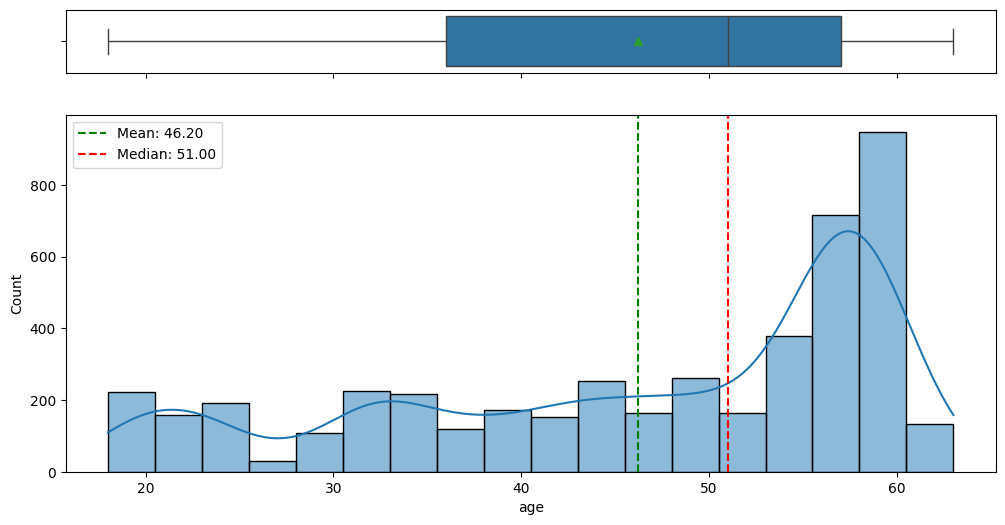

In [91]:
hist_box(data,"age")

- As shown on the graph and from data, the average age of customers is 46.20 while the median is 51. It seems older age are more interested and looking for the service.

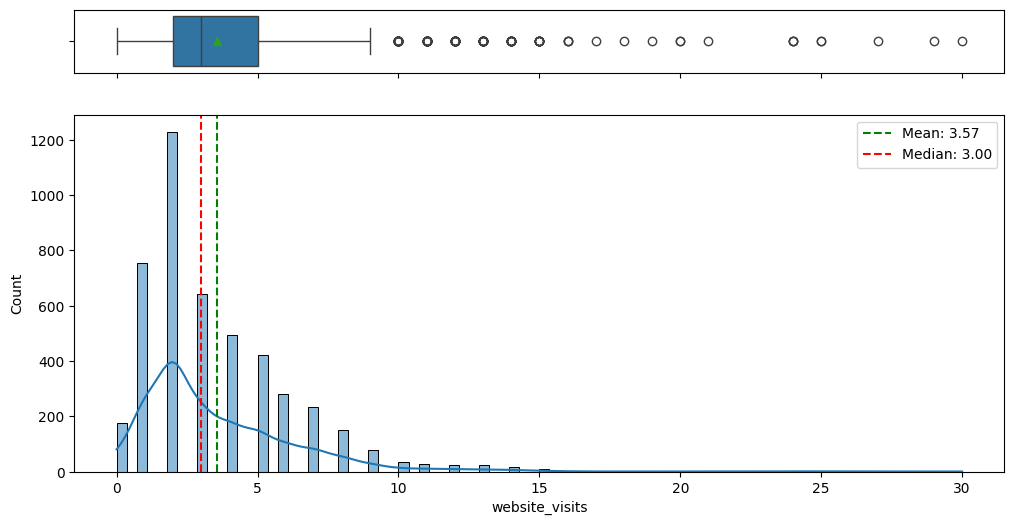

In [92]:
hist_box(data,"website_visits")

- On average, users visit the website 3.57 times, with a standard deviation of 2.83. The distribution is slightly right-skewed, with most users visiting the website between 2 to 5 times. However, there are some outliers who have visited the website up to 30 times.
- We should check to see how many leads have not visited the website.

In [93]:
# To check how many leads have not visited web-site
data[data["website_visits"] == 0].shape

(174, 14)

- 174 of the leads have not visited the website!

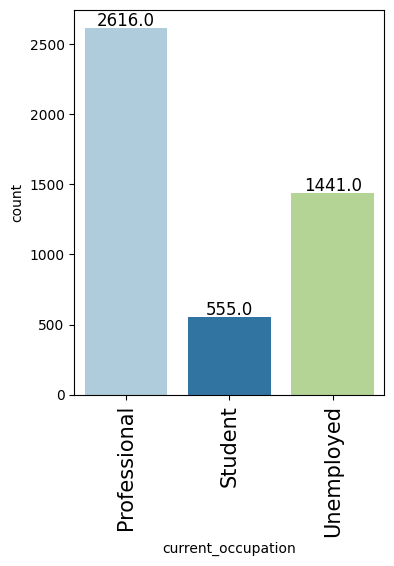

In [94]:
barplot(data,"current_occupation")

- The most common current occupation is Professional, followed by Unemployed and then Students.
- This suggests that a significant portion of the dataset consists of professionals.

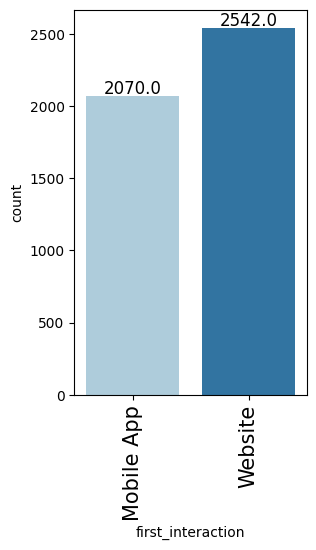

In [95]:
barplot(data,"first_interaction")

- Most users had their first interaction through the website, with a significant number also using the mobile app.

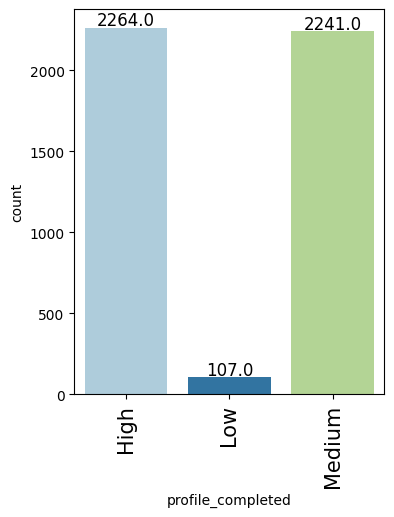

In [96]:
barplot(data,"profile_completed")

- A large number of users have completed their profiles to a High level, with Medium being slightly lower and Low being the least common.
- This indicates that a majority of users have comprehensive profiles.

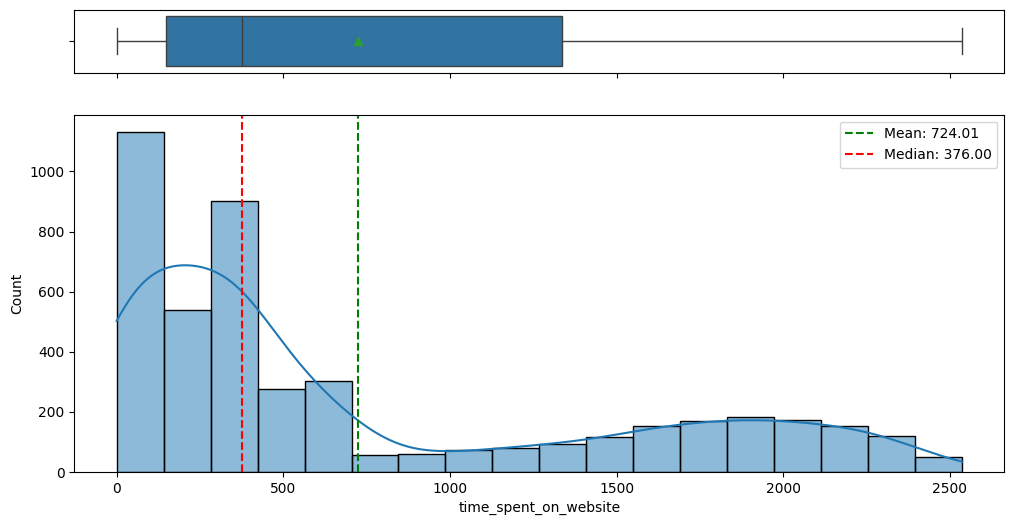

In [97]:
hist_box(data,"time_spent_on_website")

- The average time spent on the website is 724.01 seconds (about 12 minutes). The data is heavily right-skewed, with a wide range from 0 seconds to 2537 seconds. The median time spent is 376 seconds, indicating that half of the users spend less than 6.3 minutes on the website.

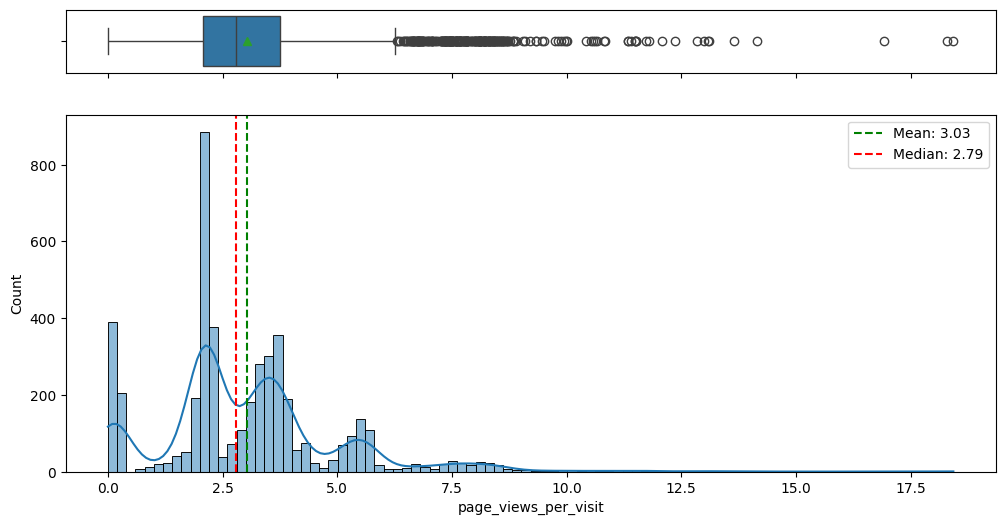

In [98]:
hist_box(data,"page_views_per_visit")

- On average, users view 3.03 pages per visit, with a standard deviation of 1.97. The data is slightly right-skewed, with most users viewing between 2 to 4 pages per visit. The maximum number of page views per visit is 18.43, indicating some users navigate through a significant number of pages in a single visit.
- There are some outliers also visible on the plot.

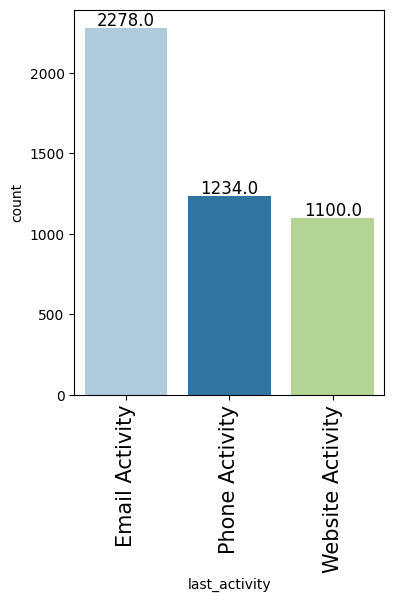

In [99]:
barplot(data,"last_activity")

- The most common last activity is Email Activity, followed by Phone Activity and then Website Activity.
- Users seem to engage more through email and phone compared to direct website interactions.

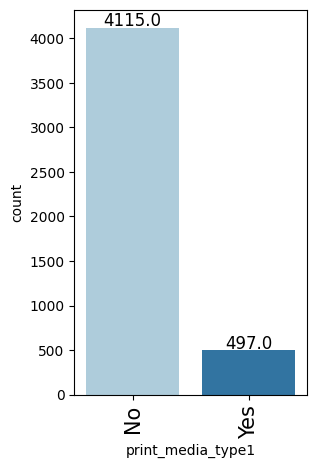

In [100]:
barplot(data,"print_media_type1")

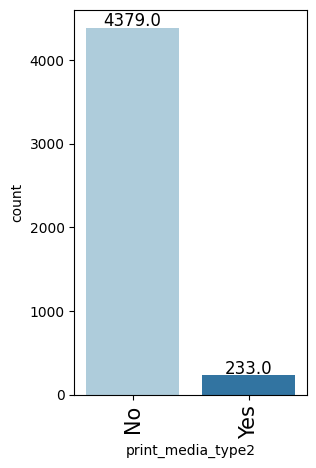

In [101]:
barplot(data,"print_media_type2")

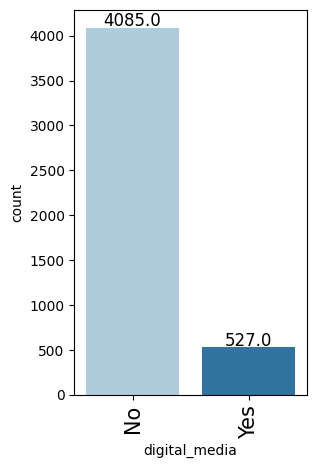

In [102]:
barplot(data,"digital_media")

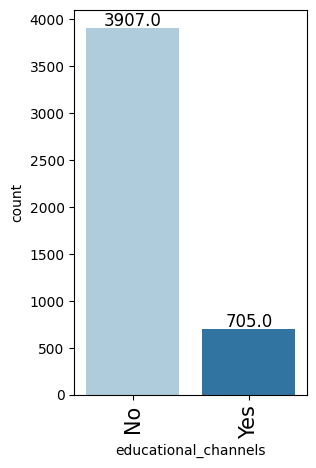

In [103]:
barplot(data,"educational_channels")

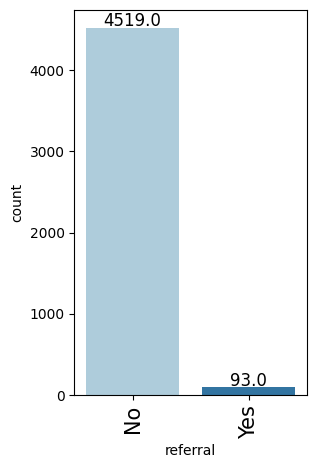

In [104]:
barplot(data,"referral")

- The majority of users did not engage with print media (print_media_type1 and print_media_type2), digital media, educational channels, or referrals.
- This suggests that traditional media channels like print are less effective in engaging this audience compared to digital media.

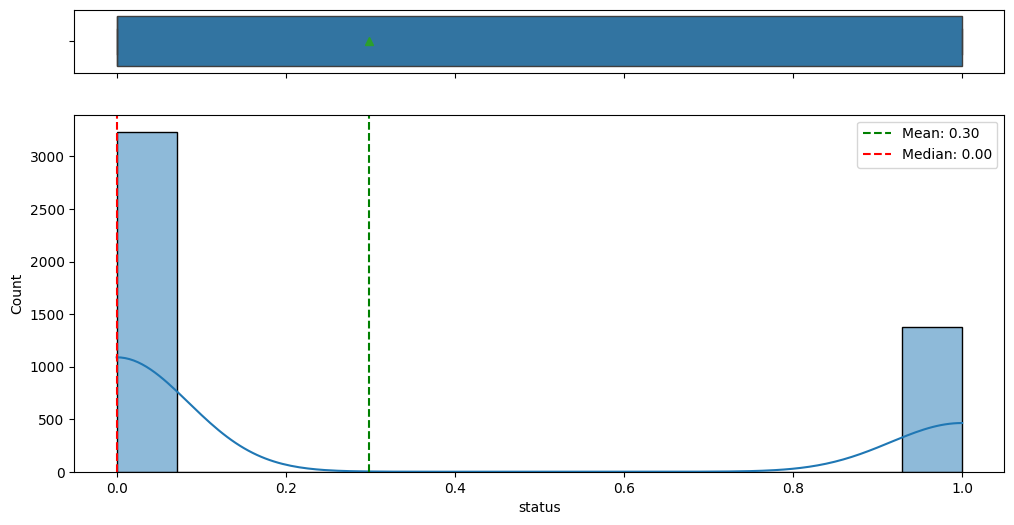

In [105]:
hist_box(data,"status")

- The mean indicates that approximately 30% of the cases have a status value of 1, while the remaining 70% have a status value of 0. This variable has categorical variable (0 or 1).

## Bivariate Analysis

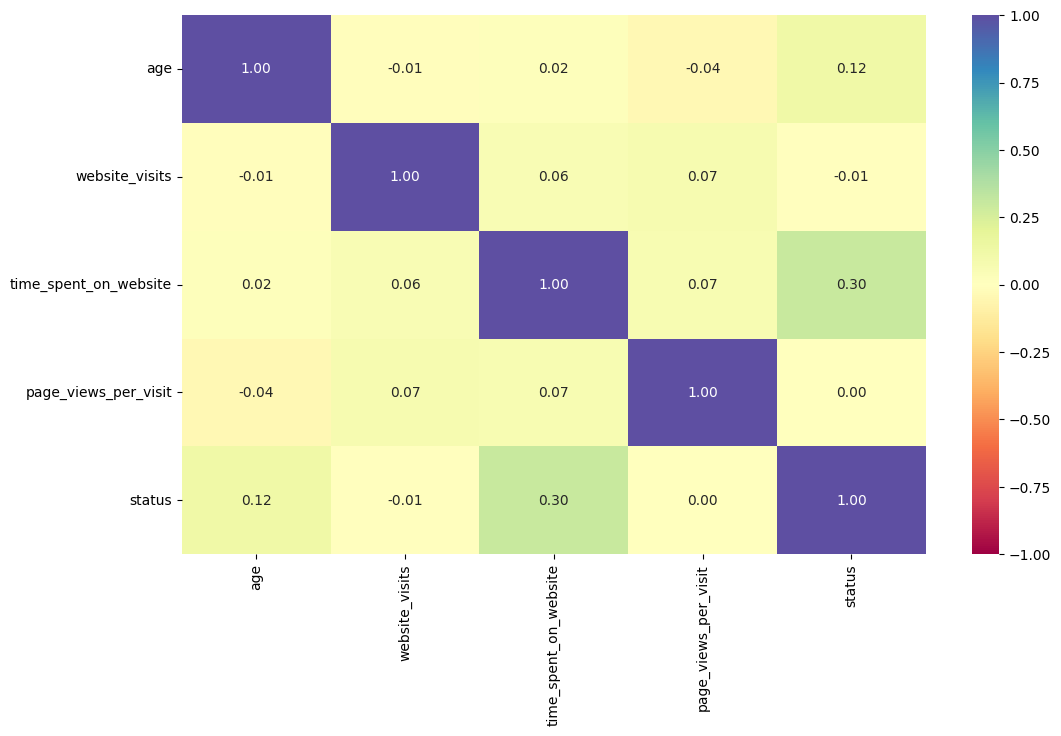

In [106]:
#use heatmap to find teh correlations between features.

# get the list of the columns
cols_list = data.select_dtypes(include=np.number).columns.tolist()

# set the figure size and call the function to do the calculation and finally plot it
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

The most important findings are:

- There is a medium positive correlation between 'status' and 'time_spent_on_website', which can be explained. (0.30)
- There is also a weak positive correlation between 'status' and 'age' which makes sense also.(0.12)
- There is a weak positive relation between 'website_visits' and 'time_spent_on_website'.(0.06)


***Questions***
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [107]:
# Plot the two varibles in stacked form

def plot_stacked_bar(data_dict, independent_var, target_var):
    # Convert the dictionary to a DataFrame
    df = pd.DataFrame(data_dict)

    # Calculate and print the stats
    count = data[independent_var].nunique()
    sorter = data[target_var].value_counts().index[-1]
    tab1 = pd.crosstab(data[independent_var], data[target_var], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)


    # Group the dataset by the independent variable and target variable
    grouped_data = df.groupby([independent_var, target_var]).size().unstack()

    # Plotting the stacked bar plot
    ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Adding labels and title
    ax.set_xlabel(independent_var)
    ax.set_ylabel('Count')
    ax.set_title('Stacked Bar Plot')

    # Adding legend
    ax.legend(title=target_var, bbox_to_anchor=(1, 1), loc='upper left')

    # Show plot
    plt.show()


**Q1- Leads will have different expectations from the outcome of the course and the current occupation may play a key role for them to take the program. Let's analyze it**

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555


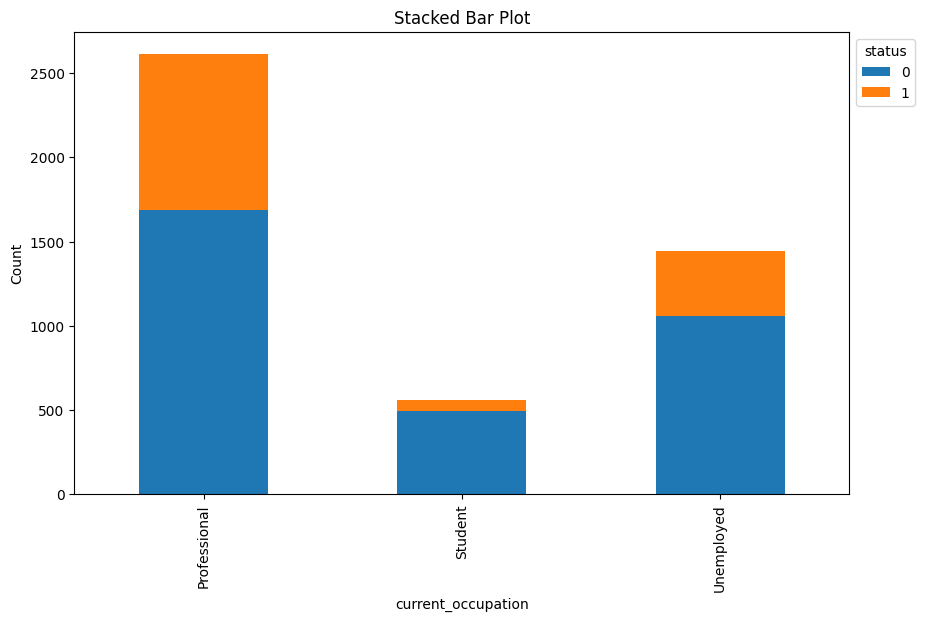

In [108]:
plot_stacked_bar(data,"current_occupation","status")

- Professionals show the highest engagement in online learning, followed by unemployed individuals.
- Students, while forming a smaller portion of the dataset, have the lowest rate of service purchase, possibly due to different educational structures or platforms they are already engaged with.
- This suggests that a significant portion of the leads who ended up purchasing the service consists of professionals, follows by unemployment and staudent at the end.


In [109]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


- The data indicates that Professionals have the highest average age, with a wider range of ages compared to Students and Unemployed individuals.
- Students have the lowest average age and the smallest spread of ages, as indicated by their low standard deviation.
- Unemployed individuals show a similar average age to Professionals but with slightly higher variability in ages.
- The 25th, 50th (median), and 75th percentiles provide insights into the age distribution within each group, showing where most individuals' ages lie.

**Q2 - The company's first interaction with leads should be compelling and persuasive. Let's see if the channels of the first interaction have an impact on the conversion of leads**

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070


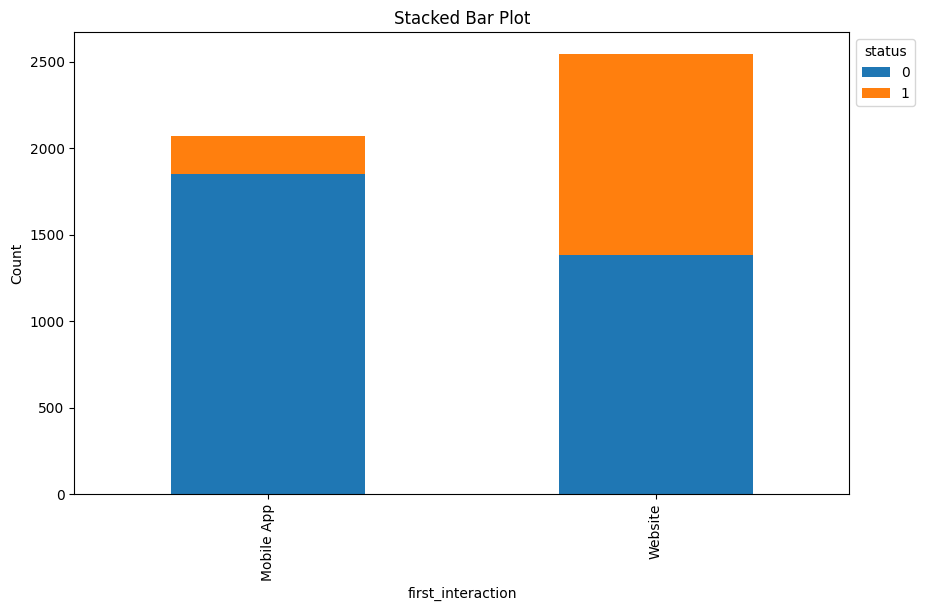

In [110]:
plot_stacked_bar(data,"first_interaction","status")

- The conversion rate (status 1 interactions divided by total interactions) for the Website is approximately 45.6% (1159 / 2542).
- The conversion rate for the Mobile App is notably lower, at around 10.5% (218 / 2070).
- The Website has a higher total number of interactions compared to the Mobile App. However, the Mobile App has a higher percentage of interactions resulting in status 0 (completed) compared to the Website.
- Consider promoting the Mobile App more prominently to encourage more users to engage with it, while ensuring that the user journey within the app is streamlined to minimize drop-offs.
- Consider implementing cross-channel strategies to leverage the strengths of both the Website and Mobile App.
- Invest in data analytics and A/B testing to continuously optimize user experiences and improve conversion rates across all channels.

In [111]:
# checking the median value
data.groupby(["status"])["time_spent_on_website"].median()

status
0    317.0
1    789.0
Name: time_spent_on_website, dtype: float64

- The considerable difference in median time spent on the website between these two groups suggests that customers who eventually purchase the service tend to spend more time on the website compared to those who do not purchase. This insight could be valuable for understanding customer behavior and optimizing strategies to encourage more conversions or purchases on the website.

In [112]:
# checking the median value
data.groupby(["status"])["page_views_per_visit"].median()

status
0    2.706
1    2.935
Name: page_views_per_visit, dtype: float64

- Customers who purchased the service (status=1) have a slightly higher median number of page views per visit compared to customers who did not purchase (status=0). This indicates that, on average, customers who end up purchasing tend to explore or engage with more pages during their visit compared to those who do not make a purchase.

**Q3 - The company uses multiple modes to interact with prospects. Which way of interaction works best?**

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234


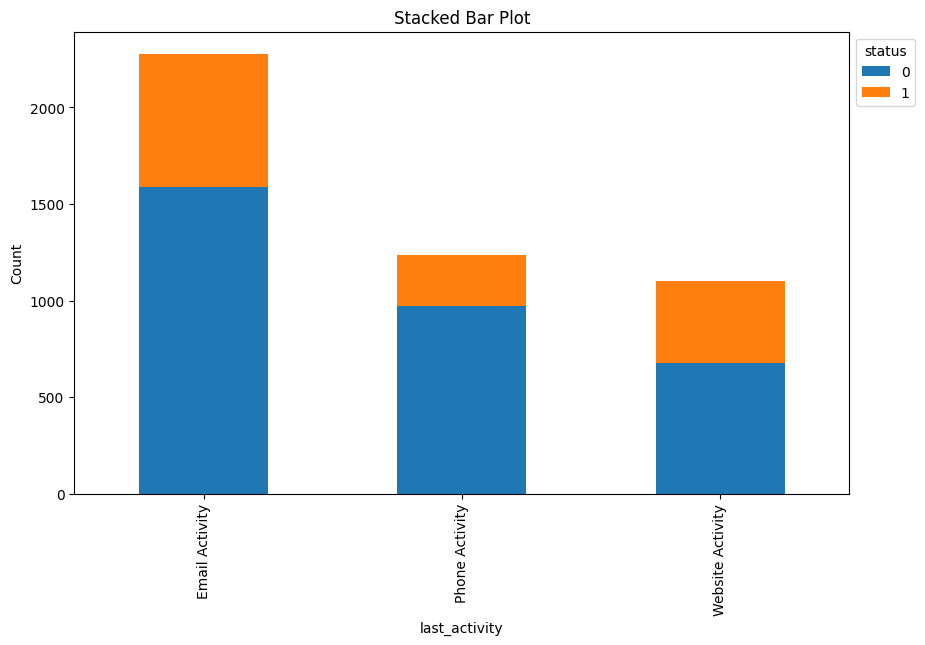

In [113]:
plot_stacked_bar(data,"last_activity","status")

- The conversion rate for Email Activity can be calculated as 691 / 2278 ≈ 30.31%.
- The conversion rate for Website Activity can be calculated as 423 / 1100 ≈ 38.45%.
- The conversion rate for Phone Activity can be calculated as 263 / 1234 ≈ 21.31%.
- The Website Activity has the highest conversion rate among the specific activities, indicating that customers who engage with the website are more likely to make a purchase compared to those who engage via email or phone.
- Email Activity has a moderate conversion rate, suggesting that while it is effective in generating leads, its conversion efficiency is lower compared to website interactions.
- Phone Activity has the lowest conversion rate, indicating that direct phone interactions might not be as effective in converting leads to purchases as online interactions.
- Overall, the company should focus on optimizing its website experience and possibly invest more resources in online marketing strategies that drive website activity, as it shows the highest potential for conversion and customer acquisition.

**Q4 - The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?**

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497


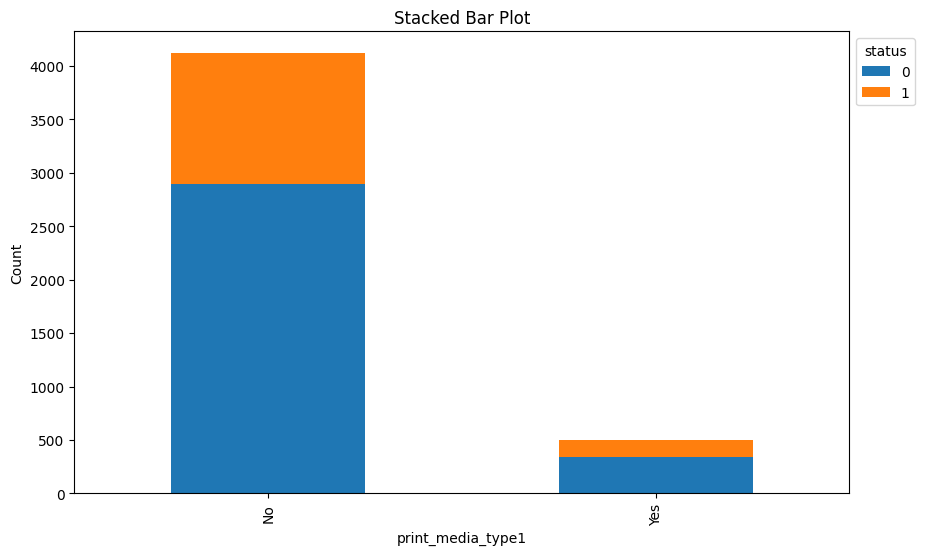

In [114]:
#let's plot the data for Newspapers
plot_stacked_bar(data,"print_media_type1","status")

- The total number of cases is 4612.
- Out of these, 1377 cases (29.84%) resulted in a purchase (status=1), while 3235 cases (70.16%) did not result in a purchase (status=0).
- Among cases where the print media type1 was specified ("No" or "Yes"), there were 4115 cases.
- Out of these, 1218 cases (29.62%) resulted in a purchase, while 2897 cases (70.38%) did not result in a purchase.
- The overall purchase rate is approximately 30%, suggesting that around 3 out of 10 customers who encounter the e-learning service end up making a purchase.
- Looking at the influence of print media type1:
  - Among cases where print media type1 was specified ("No" or "Yes"), there doesn't seem to be a significant difference in purchase rates between the two types. Both are around 30%.
  - Though custoemrs have more exposore to other types of the ad than printing.

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233


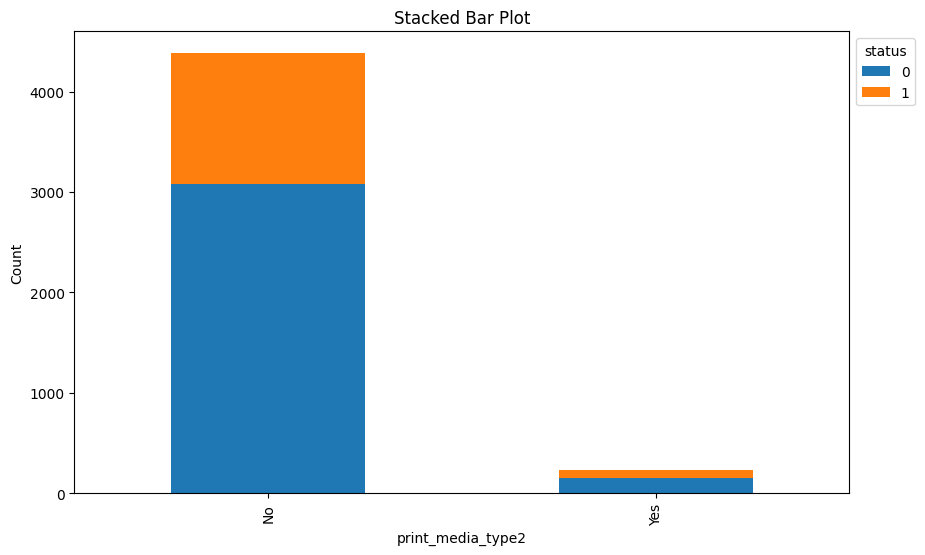

In [115]:
# Let's see the data for Magasins
plot_stacked_bar(data,"print_media_type2","status")

- 233 customers, out of which 75 purchased (Conversion Rate ≈ 32.21%)
- The "No" category had 4379 customers, of which 1302 purchased.
Although the "No" category is much larger in terms of customer count, the "Yes" category still contributed a significant number of purchases (75 out of 233 customers).
- Like the previouse one, the exposure is higher in other type of media than printed.

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527


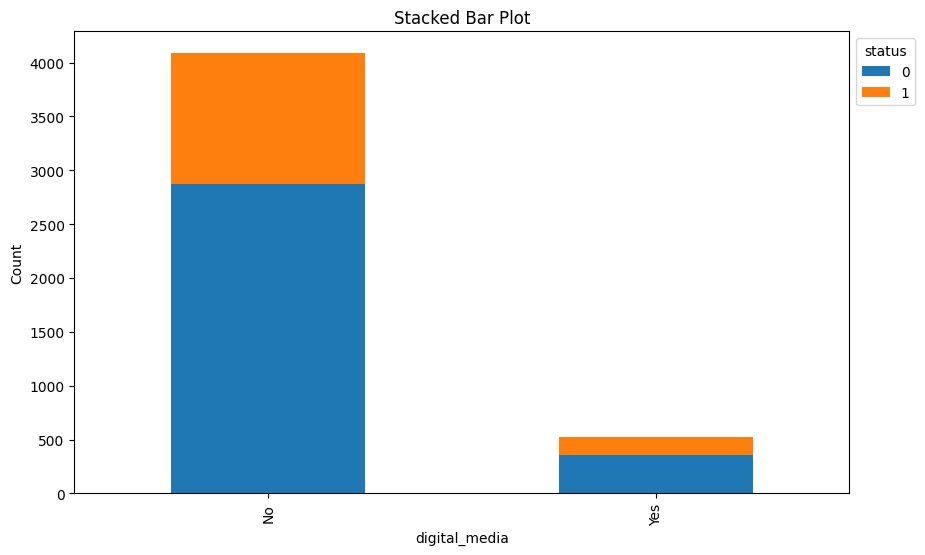

In [116]:
plot_stacked_bar(data,"digital_media","status")

- Looking at the digital media adoption rate, out of the total customer base (All: 4612), only 527 customers (No + Yes) purchased digital media. This indicates a relatively low adoption rate of digital media among customers.

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705


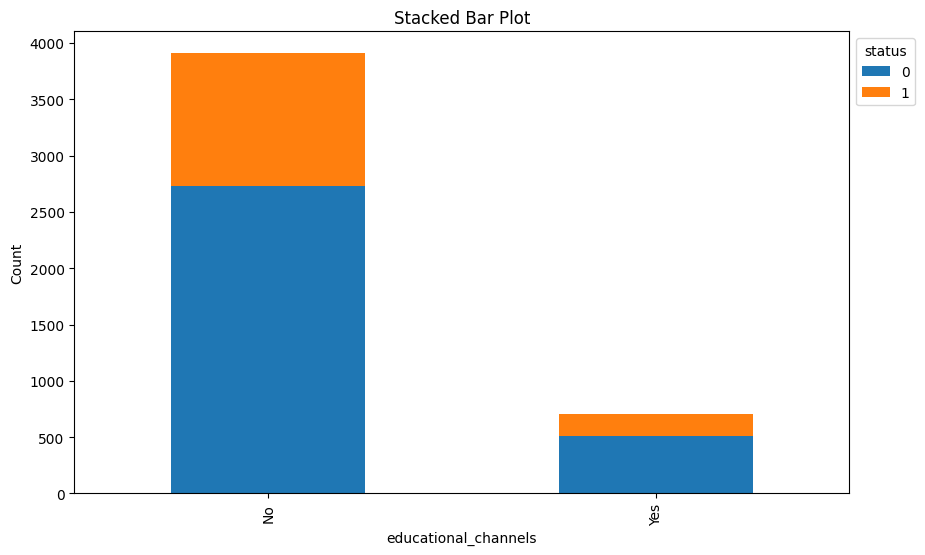

In [117]:
plot_stacked_bar(data,"educational_channels","status")

- Customers who did not use educational channels (No): 3907 (84.6% of total)
- Customers who used educational channels (Yes): 705 (15.4% of total)
- when looking at customers who used educational channels, the conversion rate is higher at 27.9% (197 out of 705 customers).
- Still a high volum of customers have not used these channels at all.

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93


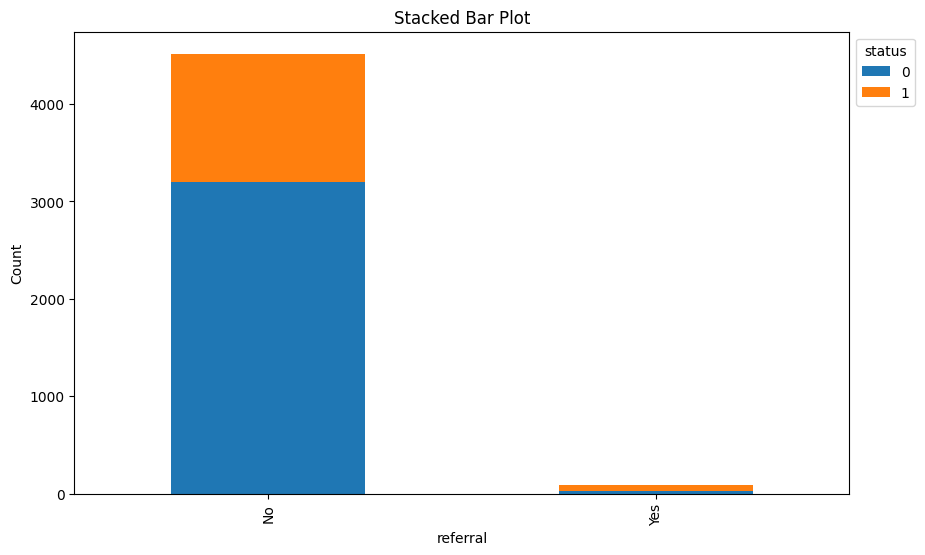

In [118]:
plot_stacked_bar(data,"referral","status")

- Many of those who ended up buying the service have not seen the advertismenets about the service on Newspaper or magazine or digital platforms!
- They also have not heard from referral or educational channels. While referrals do contribute to sales, their impact is relatively small compared to the total number of customers who did not purchase despite being referred.
- Basically, the customer exposure to the above-mentioned channels is not high!


**Q5 - People browsing the website or the mobile app are generally required to create a profile by sharing their personal details before they can access more information. Let's see if the profile completion level has an impact on lead status**

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107


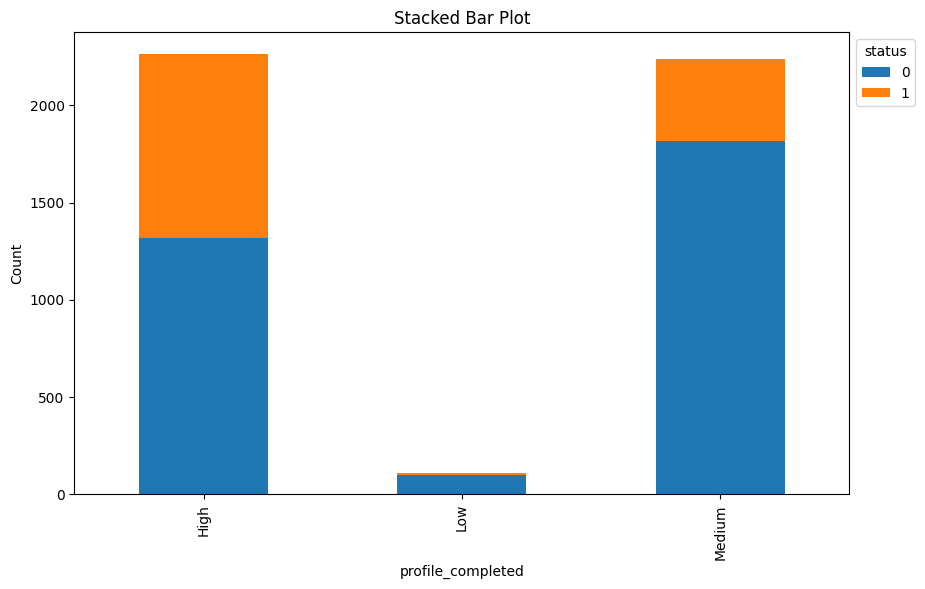

In [119]:
plot_stacked_bar(data,"profile_completed","status")

- Among all profiles, approximately 30% (1377 out of 4612) have purchased the service (Status 1), while the remaining 70% have not (Status 0).
- The majority of profiles are at the Medium Completion level, but they also have the highest percentage of profiles that have not purchased the service.
- The Low Completion level has the smallest number of profiles and the highest percentage of profiles that have not purchased the service.
- The High Completion level has a relatively balanced distribution between profiles that have and have not purchased the service.

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234


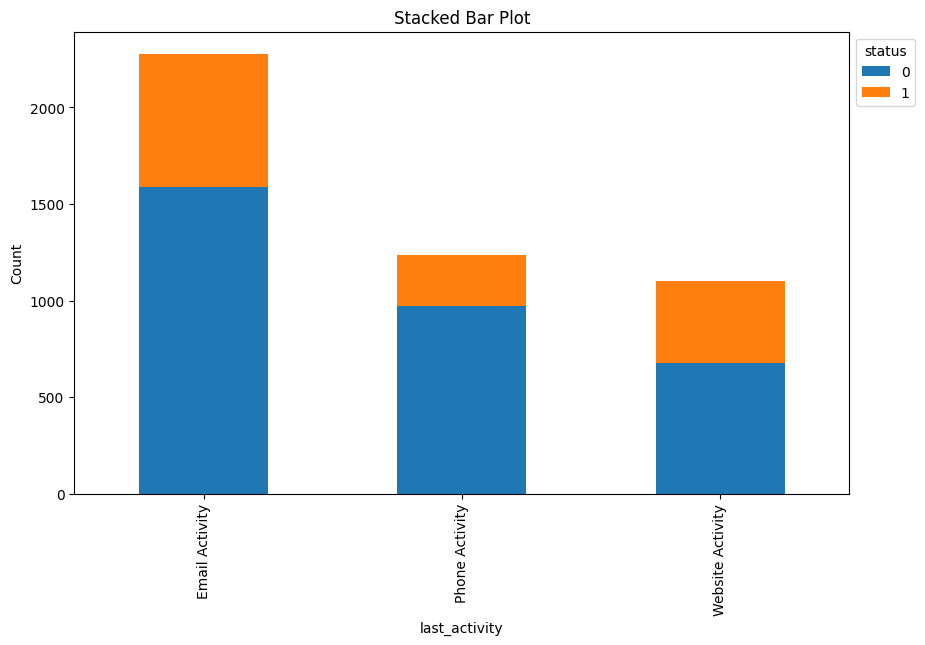

In [120]:
plot_stacked_bar(data,"last_activity","status")

- Email Activity: The conversion rate for email activity is 691/2278, which is approximately 30.33%. This suggests that email activities have a slightly higher conversion rate compared to the overall conversion rate.
- Website Activity: The conversion rate for website activity is 423/1100, which is approximately 38.45%. This indicates that website activities have a higher conversion rate compared to both email and overall conversion rates.
- Phone Activity: The conversion rate for phone activity is 263/1234, which is approximately 21.32%. Phone activities have a lower conversion rate compared to email, website, and overall conversion rates.
Recommendations:

- Since website activities have the highest conversion rate, it may be beneficial to focus more resources on optimizing and promoting activities related to the website.
- Email activities also show a decent conversion rate, so maintaining and improving email marketing strategies can continue to be effective.
- Further analysis may be needed to understand why phone activities have a lower conversion rate and explore ways to improve their effectiveness.

**Let's see how advertisement and referrals impact the lead status**

- This is already covered as part of answer for Q4 above.
- Many of those who ended up buying the service have not seen the advertismenets about the service on Newspaper or magazine or digital platforms!
- They also have not heard from referral or educational channels.
- Basically, the conversion rate through the above-mentioned channels is quite low!


## Data Preprocessing

1. Missing value treatment (if needed)
2. Feature engineering (if needed)
3. Outlier detection and treatment (if needed)
4. Preparing data for modeling
5. Any other preprocessing steps (if needed)

- From the initial analysis we learned that there was no missing values!

### **1. Missing value treatmenet**

In [121]:
# Check for missing values
missing_values = data.isnull().values.any()

if missing_values:
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

There are no missing values in the dataset.


### **2. Feature engineering**

- There is no missing value in data.
- Couple of features have outliers as identfied before.
- Most of the data is categorical which we will encode in next steps for modeling activity.
- Since we will do decision tree and random forest scaling has not much impact.

### **3. Outliers**

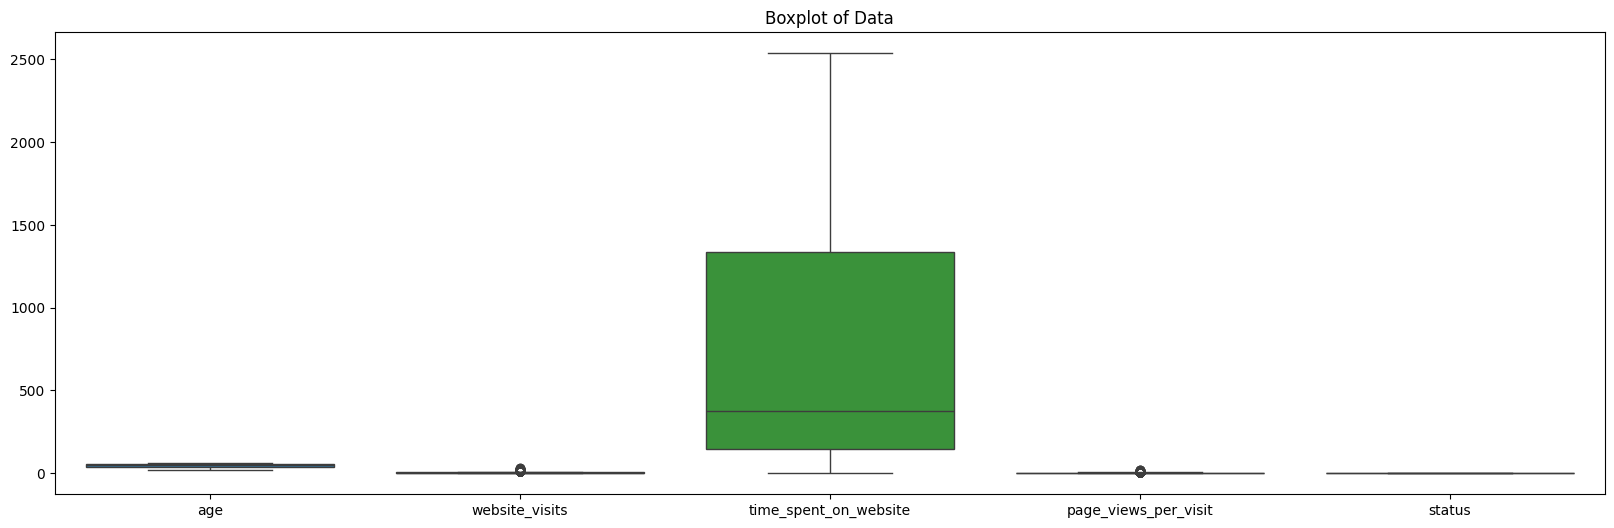

In [122]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=data)
plt.title('Boxplot of Data')
plt.show()

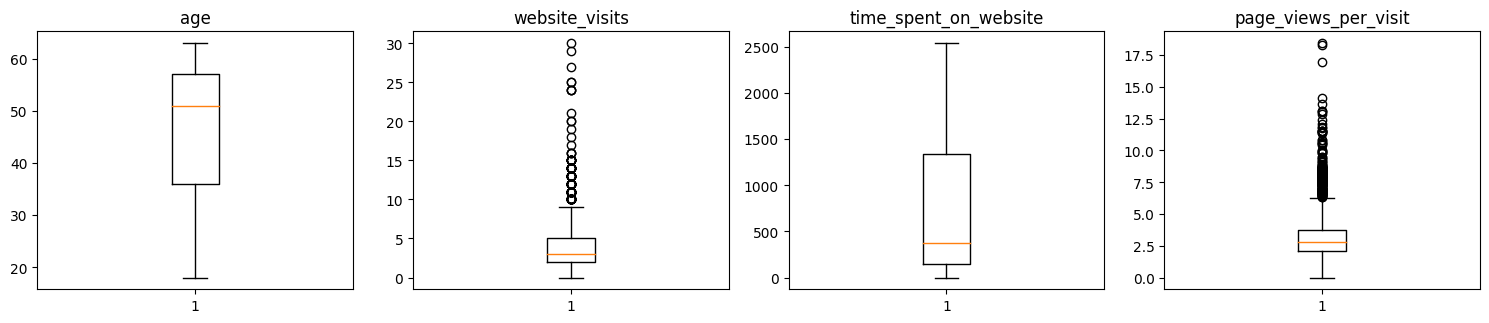

In [123]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [124]:
# find the rows that have higher website visit than 10 (aiming for ourtliers for website_visits)
data[data['website_visits']>10]

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
6,56,Professional,Mobile App,Medium,13,625,2.015,Website Activity,No,No,Yes,No,No,1
31,55,Unemployed,Website,Medium,13,1055,1.373,Email Activity,No,No,Yes,Yes,No,1
32,58,Professional,Mobile App,High,12,1151,18.434,Phone Activity,No,No,No,Yes,No,0
66,59,Unemployed,Mobile App,Medium,25,311,2.184,Phone Activity,No,No,Yes,No,No,0
201,57,Professional,Mobile App,High,14,66,2.043,Email Activity,No,No,No,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4566,59,Unemployed,Mobile App,High,13,30,3.200,Website Activity,No,No,No,Yes,No,0
4571,54,Professional,Website,High,12,1513,5.703,Email Activity,No,No,No,No,No,1
4583,49,Professional,Website,Medium,24,1039,2.064,Email Activity,Yes,No,No,No,No,1
4589,21,Student,Website,High,16,251,2.108,Phone Activity,No,No,No,No,No,0


In [125]:
filtered_df = data[data['website_visits']>10]

# Calculate the count of 'status' column in the filtered DataFrame
status_count = filtered_df['status'].value_counts()

print("status count when website_visit > 10:")
print(status_count)

status count when website_visit > 10:
0    81
1    39
Name: status, dtype: int64


In [126]:
# find the rows that have higher page view per visit than 6 (aiming for ourtliers )
data[data['page_views_per_visit']>6]

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
32,58,Professional,Mobile App,High,12,1151,18.434,Phone Activity,No,No,No,Yes,No,0
47,35,Professional,Mobile App,Medium,2,497,7.050,Email Activity,No,No,No,No,No,0
110,31,Professional,Website,High,1,187,7.364,Email Activity,No,No,No,Yes,No,1
121,56,Professional,Mobile App,Medium,2,561,6.887,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4481,48,Professional,Mobile App,Medium,2,881,6.165,Email Activity,No,No,No,Yes,No,0
4507,33,Professional,Mobile App,High,5,83,6.822,Email Activity,No,No,No,No,No,0
4514,42,Professional,Mobile App,Medium,2,762,7.997,Phone Activity,No,No,No,No,No,0
4572,55,Unemployed,Mobile App,High,1,617,7.397,Phone Activity,No,No,No,No,No,0


In [127]:
filtered_df = data[data['page_views_per_visit']>6]

# Calculate the count of 'status' column in the filtered DataFrame
status_count = filtered_df['status'].value_counts()

print("status count when page_views_per_visit > 6:")
print(status_count)

status count when page_views_per_visit > 6:
0    201
1     67
Name: status, dtype: int64


- The features website_visits, page_view_per_visit have some outliers. which are mostly related to differences in user behaviors.
- Number of rows with outliers for page_views_per_visit (>6) is: 268, the status of 201 of it is 0 and 67 is 1. Since it is about 6% of the dataset and 25% of it has status=1. So we keep the data for now.
- Number of rows with outliers for websit_vistis (>10) are: 120, the status of 39 is 1 and 81 is 0. Since it is about 3% of the dataset and 33% of it has status=1. So we keep the data for now.


### **4. Preparing Data for modeling**

- Target is to build a model to predict which lead is more likely to be converted to purchase of the service.
  - We need to take care of categorical data.
  - spilit the dataset to training and testing..

**Separating the independent variables (X) and the dependent variable (Y)**

In [128]:
# Separating target variable and other variables
X = data.drop(["status"],axis=1)
Y = data["status"]

# Creating dummy variables for X
X = pd.get_dummies(X,drop_first=True)

**Splitting the data into 70% train and 30% test set**

In [129]:
# Spiliting the data in 70% training and 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [130]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
0    0.701363
1    0.298637
Name: status, dtype: float64
Percentage of classes in test set:
0    0.70159
1    0.29841
Name: status, dtype: float64


### **Scaling the data**

The independent variables in this dataset have different scales. When features have different scales from each other, there is a chance that a higher weightage will be given to features that have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature.

The solution to this issue is **Feature Scaling**, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

Tree based models such as **Decision Trees** and **Random Forest** does not require feature scaling to be performed as they are not sensitive to the variance in the data.

### **Model evaluation criterion**

**The model can make two types of wrong predictions:**

1. Predicting a lead will not be converted to a paid customer in reality, the lead would have converted to a paid customer.
2. Predicting a lead will be converted to a paid customer in reality, the lead would not have converted to a paid customer.

**Which case is more important?**

* If we predict that a lead will not get converted and the lead would have converted then the company will lose a potential customer.

* If we predict that a lead will get converted and the lead doesn't get converted the company might lose resources by nurturing false-positive cases.

Losing a potential customer is a greater loss.

**How to reduce this loss i.e the need to reduce False Negatives?**
* **The company would want the Recall to be maximized**, greater the Recall score higher are the chances of minimizing False Negatives.

In [131]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [132]:
data.shape

(4612, 14)

- We had dropped one column ID at the early stages.

In [133]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [134]:
data.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


## **Building the model**

We will be building 2 different models:

- **Decision Tree**
- **Random Forest**

## Decision Tree

In [135]:
# Building decision tree model
d_tree = DecisionTreeClassifier(random_state=1)

In [136]:
# Fitting decision tree model
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

**Let's check the model performance of decision tree**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



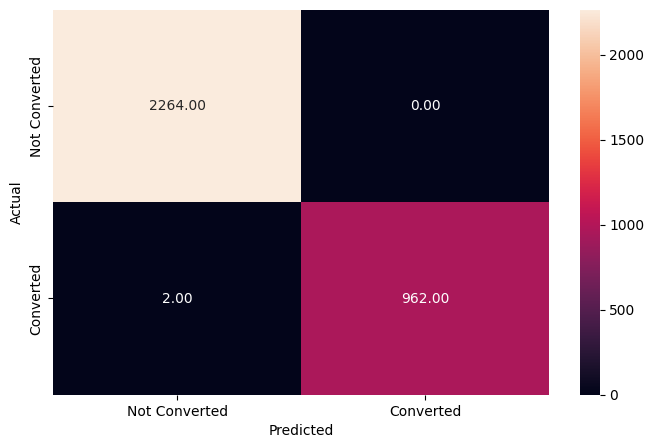

In [137]:
# Checking performance on the training dataset
y_train_pred_dt = d_tree.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

- The Decision tree is giving a **100% score for all metrics on the training dataset.**

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       971
           1       0.68      0.67      0.68       413

    accuracy                           0.81      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.81      0.81      0.81      1384



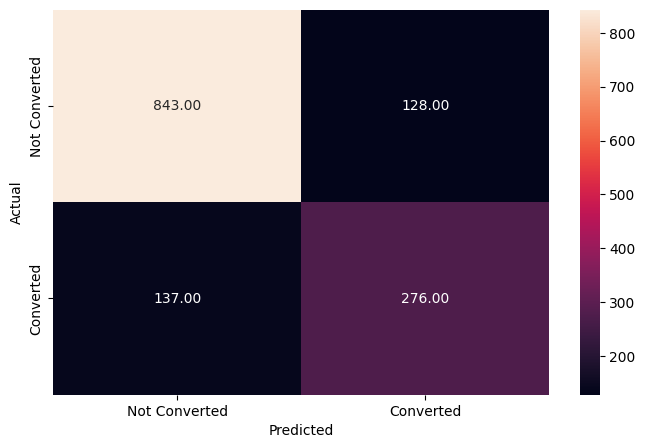

In [138]:
# Checking performance on the test dataset
y_test_pred_dt = d_tree.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

- The Decision Tree works well on the training data but **not so well on the test data** as the recall is 0.67 in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the training data.
- The precision on the test data suggests that there's a 32% (1 - 0.68) chance that the model will predict that a person is going to buy the service though he/she would not, and **the company may waste their time and energy on these customers who are not potential buyers.**


**Let's plot the feature importance and check the most important features.**

<Axes: xlabel='Importance', ylabel='None'>

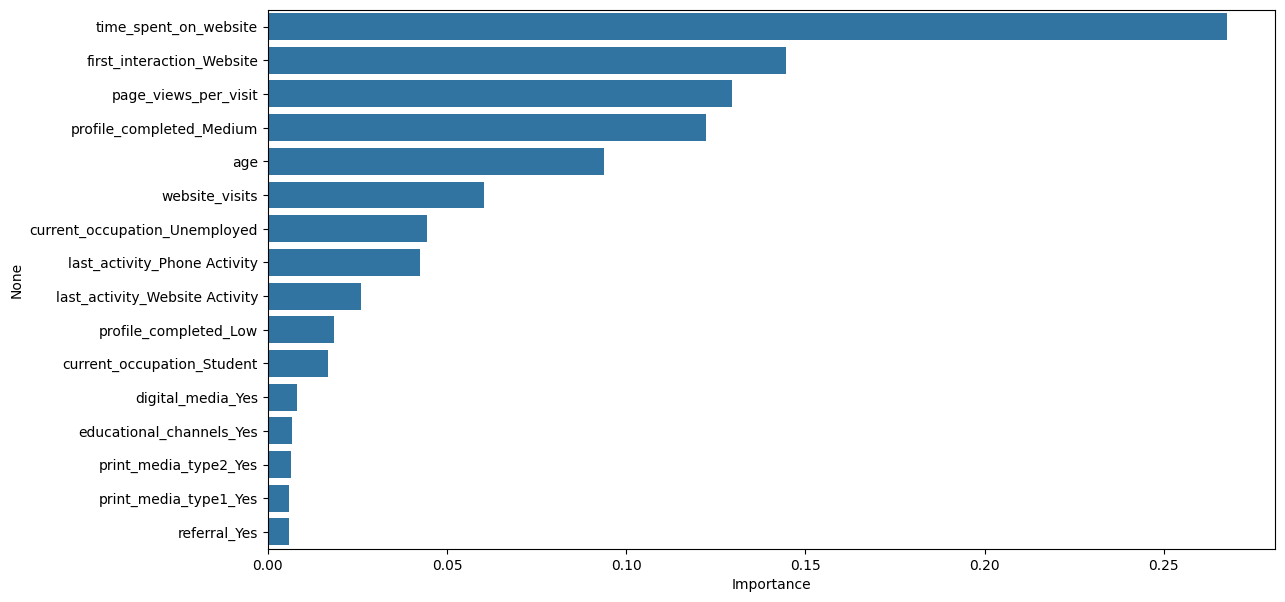

In [139]:
# Plot the feature importance

importances = d_tree.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 7))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

- According to the Decision Tree, **time_spent_on_website is the most important feature, followed by first_interaction_website, page_views_per_visit, profile_completed_medium, and age.**
- This might signify that people who are potential buyers have have spent time on the website and have made the first interaction thorugh website.
- The other important features are websites_visit, employment status, last activity.

## Do we need to prune the tree?

### **Tuning Models**

We will tune Decision Trees and Random Forest models. For tuning, we will only use Grid Search.

In [140]:
# Choose the type of classifier
# We would tell modem class 1 is the most important class.
# We set the class_weight hyperparameter as (0:0.3, 1:0.7) which is the opposite of the imbalance in the original data.

d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2264
           1       0.60      0.91      0.72       964

    accuracy                           0.79      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.79      0.80      3228



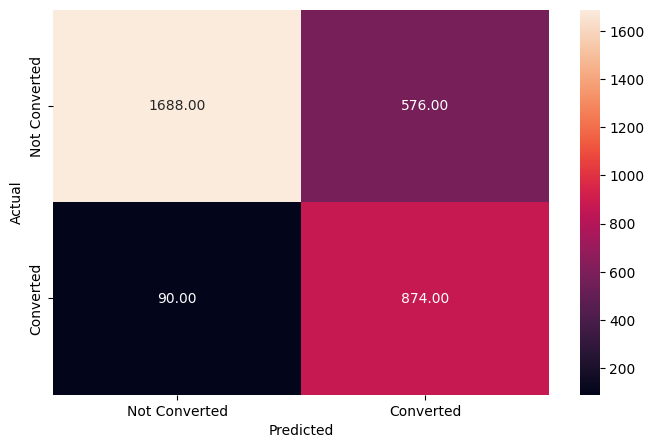

In [141]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

- In comparison to the model with default values of hyperparameters, **the performance on the training set has gone down significantly.** This makes sense because we are trying to reduce overfitting.

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       971
           1       0.58      0.89      0.70       413

    accuracy                           0.78      1384
   macro avg       0.76      0.81      0.76      1384
weighted avg       0.83      0.78      0.79      1384



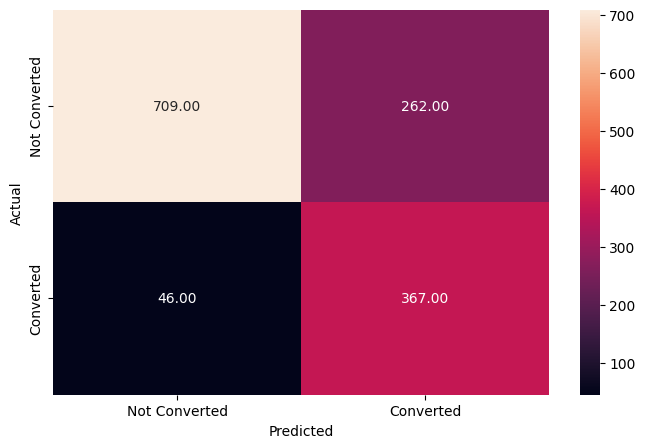

In [142]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test,y_pred_test2)

- The tuned model is not performing well in comparison to the model with default values of hyperparameters.
- The tunned model is not overfitting the training data and gives approximately the same result on the test and train datasets.
- Precision has gone down significantly from .68 to .58 in comparison to the previous model which means the tuned model will give a high number of false positives, i.e., this model will predict a lead is going to be converted even if it won't, and this will cost time and effort to the company.
- The Tuned Decision Tree model shows a trade-off between precision and recall compared to the original model, with improved recall for class 1 (default) but lower precision.

**Let's look at the feature importance of this model and try to analyze why this is happening.**

In [143]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
time_spent_on_website           0.365546
first_interaction_Website       0.313484
profile_completed_Medium        0.233702
last_activity_Phone Activity    0.048402
last_activity_Website Activity  0.032013
age                             0.006853
website_visits                  0.000000
page_views_per_visit            0.000000
current_occupation_Student      0.000000
current_occupation_Unemployed   0.000000
profile_completed_Low           0.000000
print_media_type1_Yes           0.000000
print_media_type2_Yes           0.000000
digital_media_Yes               0.000000
educational_channels_Yes        0.000000
referral_Yes                    0.000000


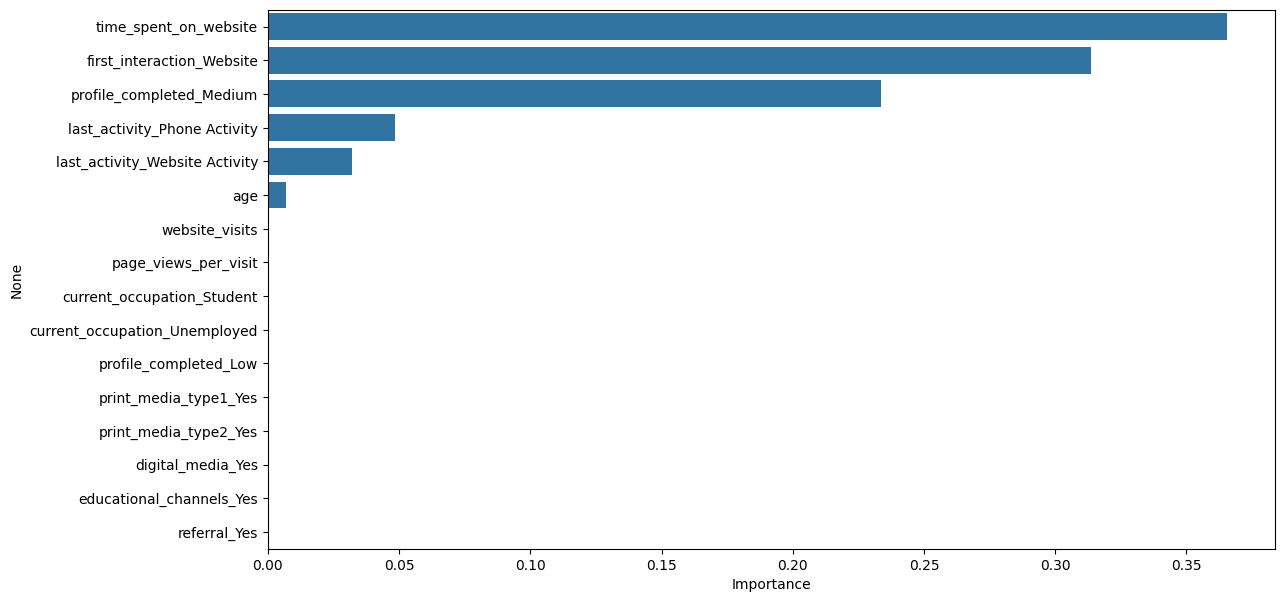

In [144]:
importances = d_tree_tuned.feature_importances_
columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 7))
sns.barplot(data=importance_df, x='Importance', y=importance_df.index)
plt.show()

- After tuning the model, we found out that 5 features are important. It seems like **the model is having high bias**, as it has over-simplified the problem and is not capturing the patterns associated with other variables.
- According to this model too, `time_spent_on_website`, `first_interaction_website`,`profile_completed_Medium`,`last_activity_phone Activity`, `last_activity_Website_activity` and `age` are the most important features that describe when there is a higher chance a lead turns to purchase of the service.

**Let's plot the tree** and check:

As we know the decision tree keeps growing until the nodes are homogeneous, i.e., it has only one class, and the dataset here has a lot of features, it would be hard to visualize the whole tree with so many features. Therefore, we are only visualizing the tree up to **max_depth = 4**.

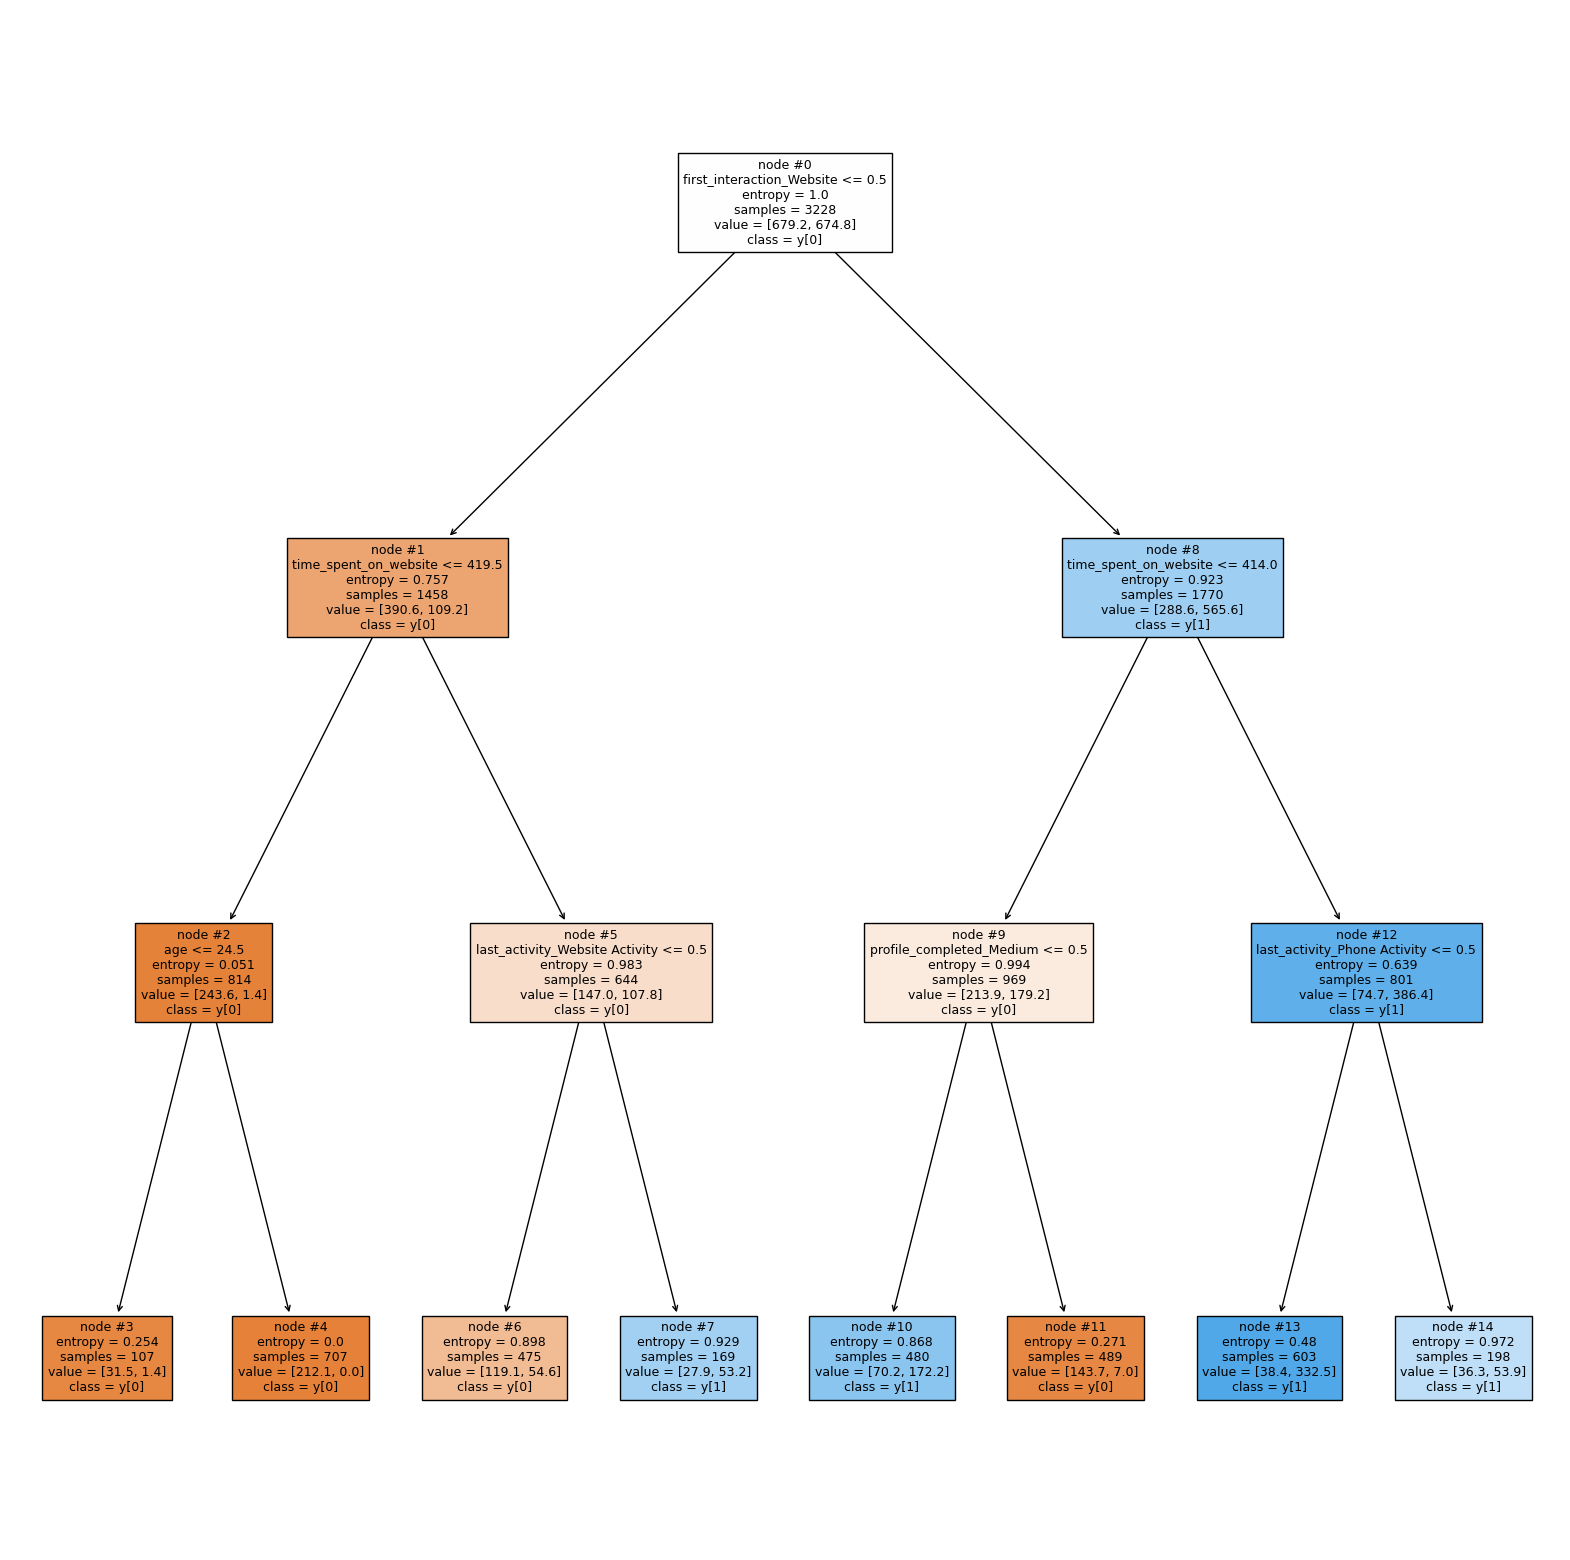

In [145]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, max_depth = 4, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

**Note:** Blue leaves represent the converted leads, i.e., **y[1]**, while the orange leaves represent the not converted leads, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

- The tree shows the same result as mentioned above for Tunned model.
- It is expected the entropy decreased for the target branches every time.


### ***Random Forest***

- **Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample, a decision tree makes a prediction.
- The results from all the **decision trees** are combined and the final prediction is made using **voting** (for classification problems) or **averaging** (for regression problems).**

In [146]:
# Fitting the Random Forest classifier on the training data
#rf_estimator = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)
rf_estimator = RandomForestClassifier()

rf_estimator.fit(X_train, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



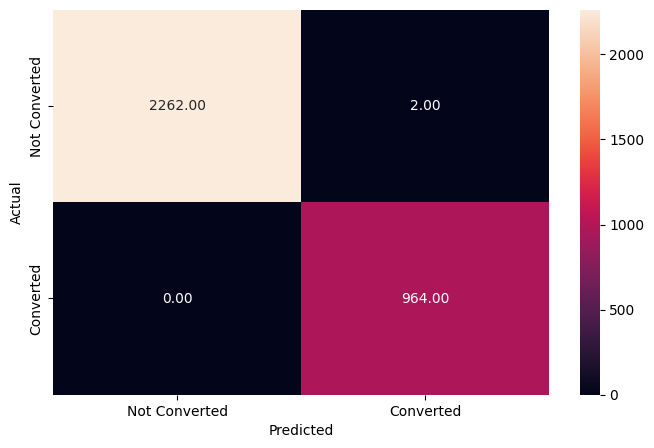

In [147]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)


- For all the metrics in the training dataset, the Random Forest gives a 100% score.

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       971
           1       0.79      0.72      0.75       413

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



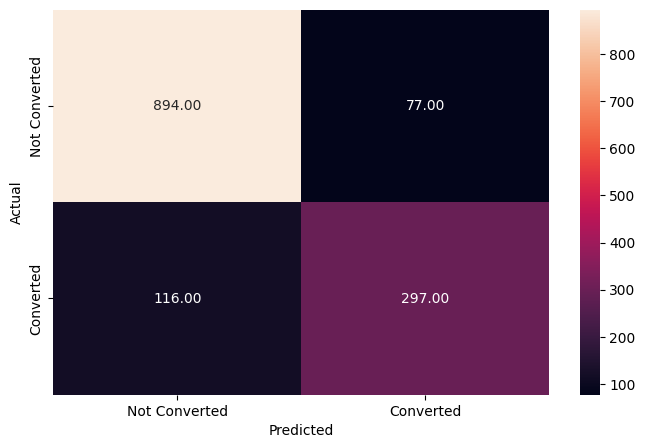

In [148]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

- The Random Forest classifier **seems to be overfitting the training data**. The recall on the training data is 1, while the recall on the test data is only ~ 0.73 for class 1.
- Precision dropped for the test data as well.

**Let's check the feature importance of the Random Forest**

<Axes: xlabel='Importance', ylabel='None'>

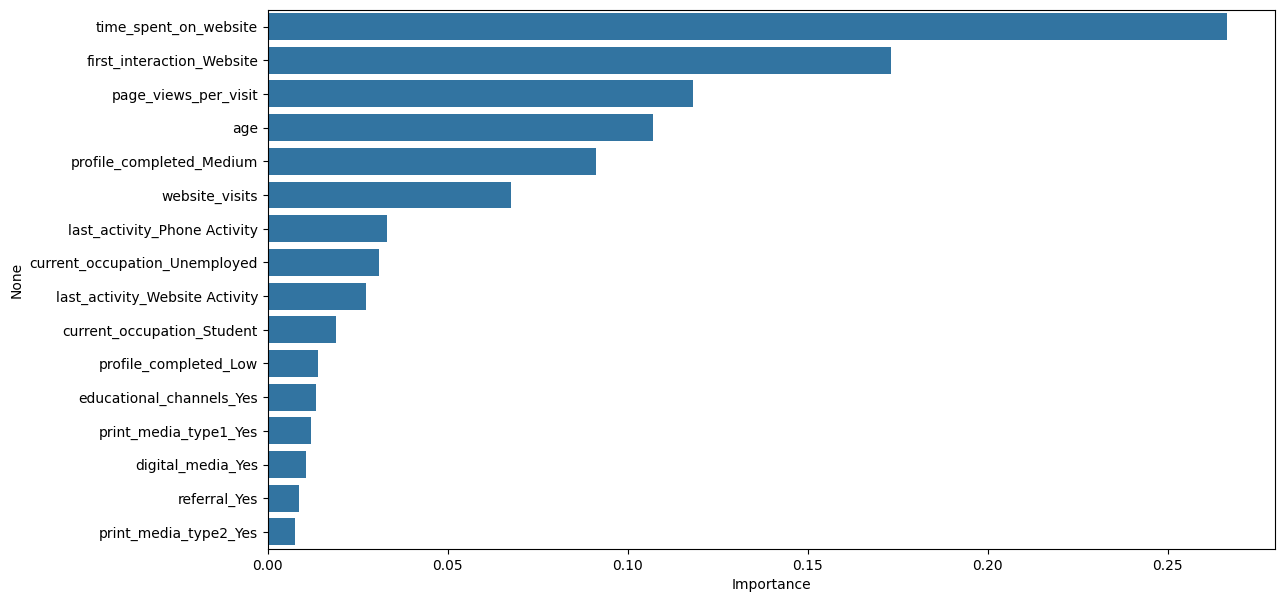

In [149]:
importances = rf_estimator.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 7))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

- The Random Forest further verifies the results from the decision tree that the most important features are `time_spent_on_website`, `first_interaction_website`, `page_views_per_visit`,`age`,`profile_completed`.


## Do we need to prune the tree?

Let's try to tune random forest and compare the results.

In [150]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
params_rf = {"n_estimators": [100,120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [151]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=6, max_features=0.9, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2264
           1       0.69      0.88      0.77       964

    accuracy                           0.84      3228
   macro avg       0.81      0.86      0.83      3228
weighted avg       0.87      0.84      0.85      3228



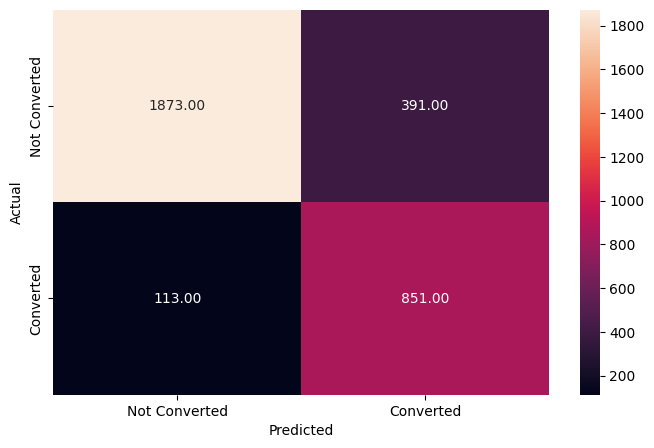

In [152]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       971
           1       0.66      0.84      0.74       413

    accuracy                           0.82      1384
   macro avg       0.79      0.83      0.80      1384
weighted avg       0.84      0.82      0.83      1384



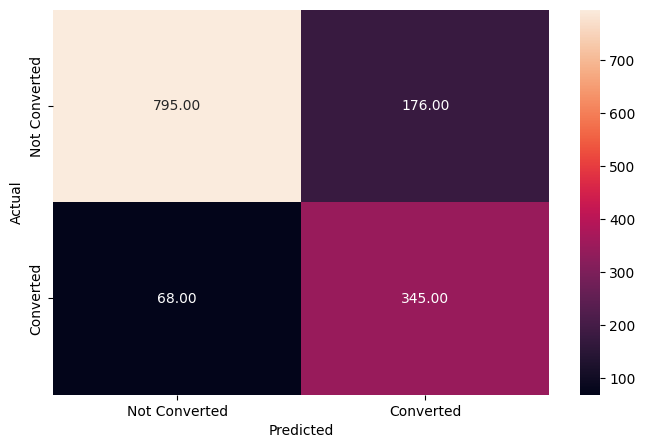

In [153]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

- The original Random Forest model performs exceptionally well on the training set with perfect scores (precision, recall, and F1-score) for both classes, indicating no errors in predictions.
- However, on the testing set, there is a noticeable drop in performance, with lower precision, recall, and F1-scores for both classes compared to the training set. This suggests overfitting of the model to the training data.
- The Tuned Random Forest model shows improvement in generalization as it has lower training set performance but performs relatively better on the testing set compared to the original model.
- The Tuned model has higher precision, recall, and F1-scores for class 1 (default) in both training and testing sets compared to the original model, indicating better detection of defaults after tuning.
- The Tuned Random Forest model shows better generalization and improved performance on unseen data compared to the original Random Forest model.

<Axes: xlabel='Importance', ylabel='None'>

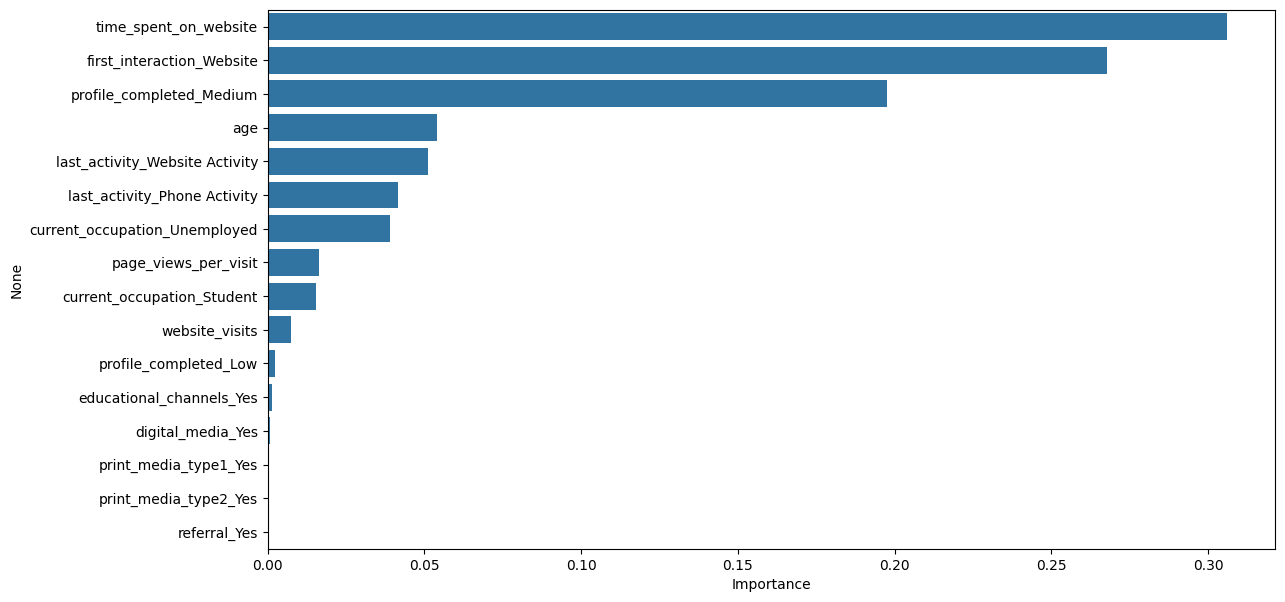

In [154]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 7))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

- **The feature importance plot for the base model and tuned model are very similar.** The model seems to suggest that `time_spent_on_website`, `first_interaction_website`, `age`, and`profile_completed_medium`are the most important features.
- Other important features among 5 important features are page_views_per_visit, last_activity_website Activity!
- Random forest has considered occupation as an important feature also.

## **Conclusions:**

- We have tried multiple models and were **able to identify the key factors involved with high coversion rate** for the company.
- The best model among these options depends on the specific priorities and trade-offs we are willing to make:

 - For Maximum Accuracy: The Random Forest model has the highest testing accuracy (0.86).
 - For Improved Generalization: The Tuned Random Forest model shows improved generalization with a balanced performance on the testing set (accuracy: 0.82).
 - For Simplicity and Interpretability: The Decision Tree model is simpler and easier to interpret but may suffer from overfitting.
 - For a Balance of Recall and Precision: The Tuned Decision Tree model shows a trade-off with improved recall but lower precision.

- In most cases, if generalization and balanced performance are crucial, the Tuned Random Forest model would be a good choice as it combines good accuracy with improved generalization compared to the original Random Forest model.

- Based on the recall scores for class 1 (default), the Tuned Decision Tree model has the highest recall on both the training (0.91) and testing (0.89) sets among all the models provided. Therefore, if maximizing recall to minimize false negatives is the primary goal, the Tuned Decision Tree model would be the best choice among the options provided.

- In conclusion, the combination of age, website interaction metrics, profile completion, and specific activity indicators (such as last activity type) are key factors influencing the models' predictions.


## Actionable Insights and Recommendations

- All models suggest that **time_spent_on_website**, first_interaction_website, age, profile_completed_medium, last_acitivity_phone, last_activity_website and page_views_per_visit are the most important features.
- Metrics related to website interaction (time_spent_on_website, first_interaction_website, page_views_per_visit, last_activity_website Activity) are consistently important, highlighting the **significance of user engagement** and activity on the website in understanding customer behavior.
- Understanding the factors influencing time spent on the website (such as content engagement, user experience, etc.) can be valuable for optimizing the website's performance and user engagement strategies.
- Understanding factors influencing page views per visit (such as website layout, content organization, etc.) can help optimize user engagement and website performance.
- Company should focus on optimizing its website experience and possibly invest more resources in online marketing strategies that drive website activity, as it shows the highest potential for conversion and customer acquisition.
- The data suggests a complex relationship between customer purchase behavior and digital media adoption. Further analysis, particularly regarding customer preferences, motivations, and potential barriers, would be valuable in devising targeted strategies to improve digital media adoption and overall sales performance.
-  Dataset reflects a user base primarily consisting of professionals who tend to interact more through **digital platforms like websites and email**. The majority of users have completed their profiles to a high level, indicating active engagement with the platform. However, there is **limited engagement with traditional media channels** and referrals, highlighting the preference for digital interactions among this demographic.
- Based on this data, if we're looking to target a specific age group for a particular service or product, we might consider focusing more on Professionals and Unemployed individuals due to their higher average ages, assuming the target demographic aligns with these age ranges. However, it's crucial to consider other factors such as interests, needs, and purchasing power beyond just age when developing marketing strategies or designing products/services.
- Consider implementing cross-channel strategies to leverage the strengths of both the Website and Mobile App.
- Invest in data analytics and A/B testing to continuously optimize user experiences and improve conversion rates across all channels.
- **Medium Profile Completion level** has the highest number of profiles but also the highest percentage of non-purchases, consider optimizing the completion process to improve conversion rates. This could involve simplifying the steps, providing incentives, or addressing any barriers that may be hindering conversions.
